In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [166]:
# df1 = pd.read_json('bucket1.json', lines = True)

In [167]:
# df2 = pd.read_json('bucket2.json', lines = True)

In [168]:
# df3 = pd.read_json('bucket3.json', lines = True)

In [169]:
# df1 = pd.read_json('bucket1.json', lines = True)
# df2 = pd.read_json('bucket2.json', lines = True)
# df3 = pd.read_json('bucket3.json', lines = True)
# df4 = pd.read_json('bucket4.json', lines = True)
# df5 = pd.read_json('bucket5.json', lines = True)

In [170]:
# df5 = pd.read_json('bucket5.json', lines = True)

In [171]:
# frames = [df1a, df2a, df3a]

# result = pd.concat(frames)

In [172]:
# f = df1.copy()
# s = df2.copy()
# t = df3.copy()
# fo = df4.copy()
# fi = df5.copy()

# cols = [f,s,t,fo,fi]

# comments_df = pd.concat(cols)

In [2]:
comments_df = pd.read_csv('/home/heather/galvanize/Capstone2/cleaned_comments.csv')

In [ ]:
# delete any line that doesnt have a label...something that no one has commented on
# or ID types of comments that no one engages with
# divide the data up into four separate datasets....one dataset where each article has at least one...then make a multilabel predictor
# cluster the information that people find funny and like...funny and sad...wow and sad
# refression or classification? how many likes or is it likely to get any likes at all

In [7]:
#drop all values that have no funny,wow,sad...
# sentiment_array = comments_df[['funny', 'wow', 'sad', 'disagree', 'likes']]
# cleaned_df = comments_df.loc[~(sentiment_array==0).all(axis=1)].reset_index()

In [45]:
# new_s_df = cleaned_df[['funny', 'wow', 'sad', 'disagree', 'likes']]

# idx_non_zero = []
# for i in new_s_df[:10].values:
#     if sum(i) != 0:
#         idx_non_zero.append(i)


In [10]:
comments_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [11]:
comments_df.head()

,funny,wow,text,publication_id,rating,article_id,id,sad,created_at,disagree,likes,parent_id
0,0,0,haha you guys are a bunch of losers.,2,rejected,2006,59856,0,2015-09-29 10:50:48.488476+00:00,0,1,NaN
1,0,0,"The best ever, beats any store!!!!!",6,approved,8384,382490,0,2016-07-10 22:38:03.752194+00:00,0,1,NaN
2,0,0,I misread the post and thought you advocated p...,6,approved,24149,372518,0,2016-07-02 04:01:47.420529+00:00,0,1,NaN
3,0,0,The best part is a Canadian would read this an...,6,approved,24149,372801,0,2016-07-02 14:56:08.837415+00:00,0,1,NaN
4,0,0,You forgot the Palpating of the Poutine Gravy ...,6,approved,24149,372493,0,2016-07-02 03:26:50.607144+00:00,0,1,NaN


In [13]:
comments_df[comments_df.text.isna()]

,funny,wow,text,publication_id,rating,article_id,id,sad,created_at,disagree,likes,parent_id
736029,0,0,NaN,13,approved,141670,392337,0,2016-07-18 19:34:48.278774+00:00,0,1,392165.0


In [14]:
comments_df.drop(index = 736029, axis = 0, inplace = True)

In [16]:
ordered = comments_df.sort_values(by='created_at')

In [33]:
pd.to_datetime(ordered.created_at[0])

Timestamp('2015-09-29 10:50:48.488476+0000', tz='UTC')

In [37]:
ordered.head()

,funny,wow,text,publication_id,rating,article_id,id,sad,created_at,disagree,likes,parent_id
0,0,0,haha you guys are a bunch of losers.,2,rejected,2006,59856,0,2015-09-29 10:50:48.488476+00:00,0,1,NaN
1040276,0,0,How can the author claim that Star Wars is bet...,25,approved,141164,383773,0,2015-09-29 16:20:53.059406+00:00,0,1,NaN
790125,0,0,How can the author claim that Star Wars is bet...,22,approved,59527,282338,0,2015-09-29 16:20:53.059406+00:00,0,1,NaN
64184,0,0,How can the author claim that Star Wars is bet...,24,approved,138857,351547,0,2015-09-29 16:20:53.059406+00:00,0,1,NaN
645361,0,0,How can the author claim that Star Wars is bet...,111,approved,32846,240390,0,2015-09-29 16:20:53.059406+00:00,0,1,NaN


In [48]:
# ordered['created'] = [pd.to_datetime(dt).date() for dt in ordered['created_at']]


KeyboardInterrupt: 

In [52]:
ordered['created'] = [dt.date() for dt in ordered['created']]

In [59]:
ordered.tail(1)

,funny,wow,text,publication_id,rating,article_id,id,sad,created_at,disagree,likes,parent_id,created
337502,0,0,Secrecy is an internal component of the TPP. E...,54,approved,399437,6333090,0,2017-11-10 22:31:00.384647+00:00,0,1,6331916.0,2017-11-10


In [55]:
tot = ordered.groupby('created').sum()

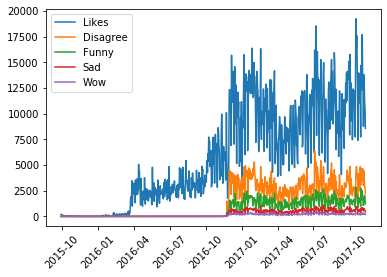

In [78]:
plt.plot(tot.likes, label = 'Likes')
plt.plot(tot.disagree, label = 'Disagree')
plt.plot(tot.funny, label = 'Funny')
plt.plot(tot.sad, label = 'Sad')
plt.plot(tot.wow, label = 'Wow')
plt.xticks(rotation=45)
plt.
plt.legend()
plt.savefig('ratings_per_day')
# around February of 2016 we have our first instances of ratings other than likes

In [83]:
tot2 = ordered.groupby('created').count()

(array([160189., 342831., 205037., 133841.,  91708.,  64189.,  46928.,
         35136.,  26779.,  20506.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

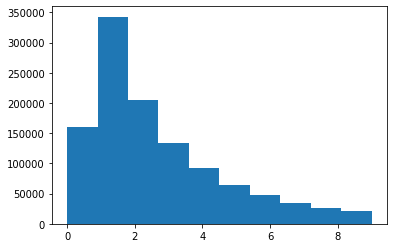

In [99]:
plt.hist(ordered[ordered.likes <10].likes)

In [ ]:
.to_csv('cleaned_comments.csv')
